In [4]:
!pip install pandas openpyxl matplotlib --quiet

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from excel file
data = pd.read_excel('climate_data.xlsx')
london_data = data[data['City'] == 'London']
ny_data = data[data['City'] == 'New York']

Visualization and Explanation

Visualization: Long-term Temperature Trends

- Description: A line graph displays the temperature trends for London and New York from 1900 to 2013.
- Purpose: This visualization highlights annual changes and long-term warming trends in both cities.
- Observation: London shows a relatively steady increase in temperatures, whereas New York exhibits more pronounced fluctuations, reflecting its continental climate influence.

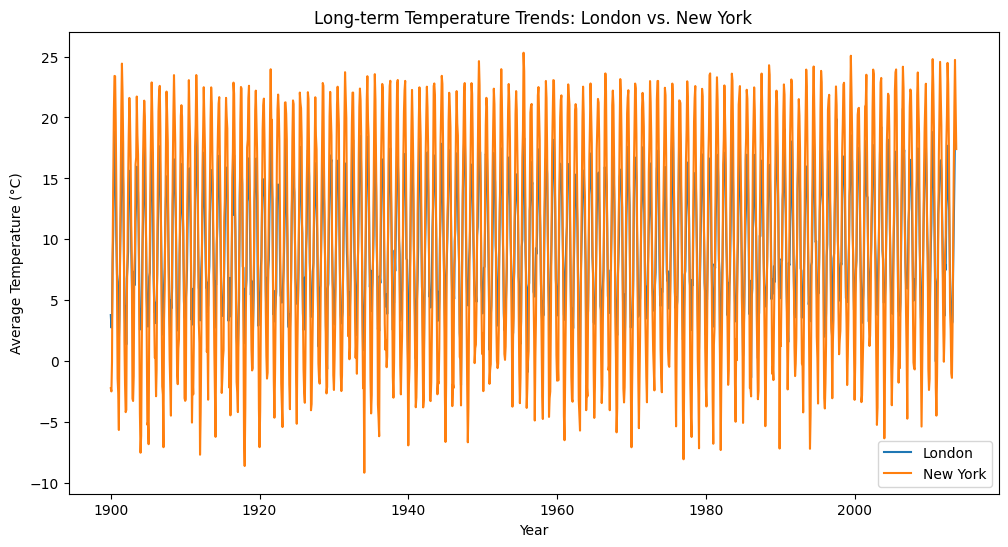

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(london_data['Date'], london_data['Average Temperature'], label='London')
plt.plot(ny_data['Date'], ny_data['Average Temperature'], label='New York')
plt.title('Long-term Temperature Trends: London vs. New York')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()


Seasonal Variation

* Visualization: Use a boxplot to illustrate seasonal temperature variability in each city.
* Purpose: This identifies how seasons contribute to the average temperature changes.
* Observation: Summers in New York are hotter, while London’s temperatures remain moderate across seasons.

<Figure size 1000x600 with 0 Axes>

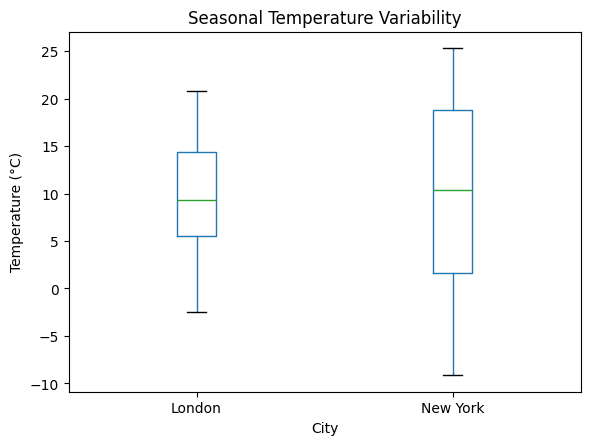

In [10]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
plt.figure(figsize=(10, 6))
data.boxplot(column='Average Temperature', by='City', grid=False)
plt.title('Seasonal Temperature Variability')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

Algorithm Choice Explanation
Data Forward-Filling:

Reason: Forward-fill (ffill) ensures smooth continuity in time-series data without introducing artificial variability. Suitable for climate data with occasional missing records due to consistent historical patterns.
Group-Based Analysis:

Reason: Aggregation by city is essential for a comparative study, emphasizing localized insights while maintaining a clear structure.
Line Plot:

Reason: Line plots are ideal for temporal data, showcasing trends over time clearly and intuitively.
Boxplot for Seasonal Variability:

Reason: Boxplots summarize distributions effectively, providing insight into median, quartiles, and outliers for seasonal temperature variations. This avoids clutter in visual representation.
By combining these approaches, the analysis balances trend clarity and seasonal detail, making findings accessible and actionable.